In [4]:
!pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [52]:
import openpyxl
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [53]:
cdm = pd.read_excel('data/Players_WC2014.xlsx', engine='openpyxl')
cdm.head()

Clearance Rate Colors Distance Covered In Possession  \
0            NaN    NaN                            NaN   
1            NaN    NaN                            NaN   
2            NaN    NaN                            NaN   
3            NaN    NaN                          2.1km   
4              -    NaN                          5.0km   

  Distance Covered Not In Possession Distance Covered Location  \
0                                NaN              NaN  Algeria   
1                                NaN              NaN  Algeria   
2                                NaN              NaN  Algeria   
3                              4.2km            8.7km  Algeria   
4                             10.0km           20.6km  Algeria   

                  Name     Team Top Speed  % Passes Completed  Assists  \
0   Cedric SI MOHAMMED  Algeria       NaN                 NaN      NaN   
1    Liassine CADAMURO  Algeria       NaN                 NaN      NaN   
2  Mohamed ZEMMAMOUCHE  Algeria       NaN                 NaN      NaN   
3         Riyad MAHREZ  Algeria  23.9km/h                0.55      NaN   
4        Saphir TAIDER  Algeria  25.7km/h                0.74      NaN   

   Attempted Clearances  Attempts In The Area  Attempts Off-Target  \
0                   NaN                   NaN                  NaN   
1                   NaN                   NaN                  NaN   
2                   NaN                   NaN                  NaN   
3                   NaN                   1.0                  1.0   
4                   0.0                   NaN                  NaN   

   Attempts On Target  Attempts On-Target From Inside The Area  \
0                 NaN                                      NaN   
1                 NaN                                      NaN   
2                 NaN                                      NaN   
3                 0.0                                      0.0   
4                 NaN                                      NaN   

   Attempts On-Target From Outside The Area  Attempts Outside The Area  
0                                       NaN                        NaN  
1                                       NaN                        NaN  
2                                       NaN                        NaN  
3                                       0.0                        0.0  
4                                       NaN                        NaN

In [22]:
teams = cdm[['Team', 'Name']]
teams = teams.groupby('Team').size().to_dict()
teams = dict(sorted(teams.items(), key=lambda v: v[1]))
teams

{'Ecuador': 22,
 'England': 22,
 'France': 22,
 'Germany': 22,
 'Algeria': 23,
 'Argentina': 23,
 'Australia': 23,
 'Belgium': 23,
 'Bosnia': 23,
 'Brazil': 23,
 'Cameroon': 23,
 'Chile': 23,
 'Colombia': 23,
 'Costa Rica': 23,
 'Croatia': 23,
 "Côte d'Ivoire": 23,
 'Ghana': 23,
 'Greece': 23,
 'Honduras': 23,
 'Iran': 23,
 'Italy': 23,
 'Japan': 23,
 'Korea Republic': 23,
 'Mexico': 23,
 'Netherlands': 23,
 'Nigeria': 23,
 'Portugal': 23,
 'Russia': 23,
 'Spain': 23,
 'Switzerland': 23,
 'USA': 23,
 'Uruguay': 23}

In [77]:
def clean_data(d):
    lot1 = [
        'Distance Covered In Possession',
        'Distance Covered Not In Possession',       
        'Distance Covered']
    for c in d.columns:
        if c in lot1:
            d[c] = d[c].apply(lambda r: float(str(r).replace('km', '')))
    lot2 = ['Top Speed']
    for c in d.columns:
        if c in lot2:
            d[c] = d[c].apply(lambda r: float(str(r).replace('km/h', '')))
    return d

In [54]:
# les 3 joueurs avec le plus de distance
players = clean_data(cdm[['Name', 'Distance Covered', 'Location']])
players = players.sort_values(by=['Distance Covered'], ascending=False, na_position='last') 
players.head(3)

Name  Distance Covered   Location
362     Thomas MUELLER              84.0    Germany
353         Toni KROOS              82.6    Germany
42   Javier MASCHERANO              81.2  Argentina

In [58]:
players2 = clean_data(cdm[['Name', 'Distance Covered', 'Location', 'Distance Covered In Possession', 'Distance Covered Not In Possession']])
palyers2 = players2.sort_values(by=['Distance Covered', 'Distance Covered In Possession', 'Distance Covered Not In Possession'], 
                                ascending=True, na_position='last')
players2.tail(3)

Name  Distance Covered Location  \
729       Graham ZUSI              33.7      USA   
730  DaMarcus BEASLEY              42.8      USA   
731   Michael BRADLEY              54.7      USA   

     Distance Covered In Possession  Distance Covered Not In Possession  
729                            11.4                                13.8  
730                            13.0                                18.5  
731                            19.0                                21.2

bias de selection : distance covered proportinnelle à d isnatce not in possession ?
                            à distance in posseion ?



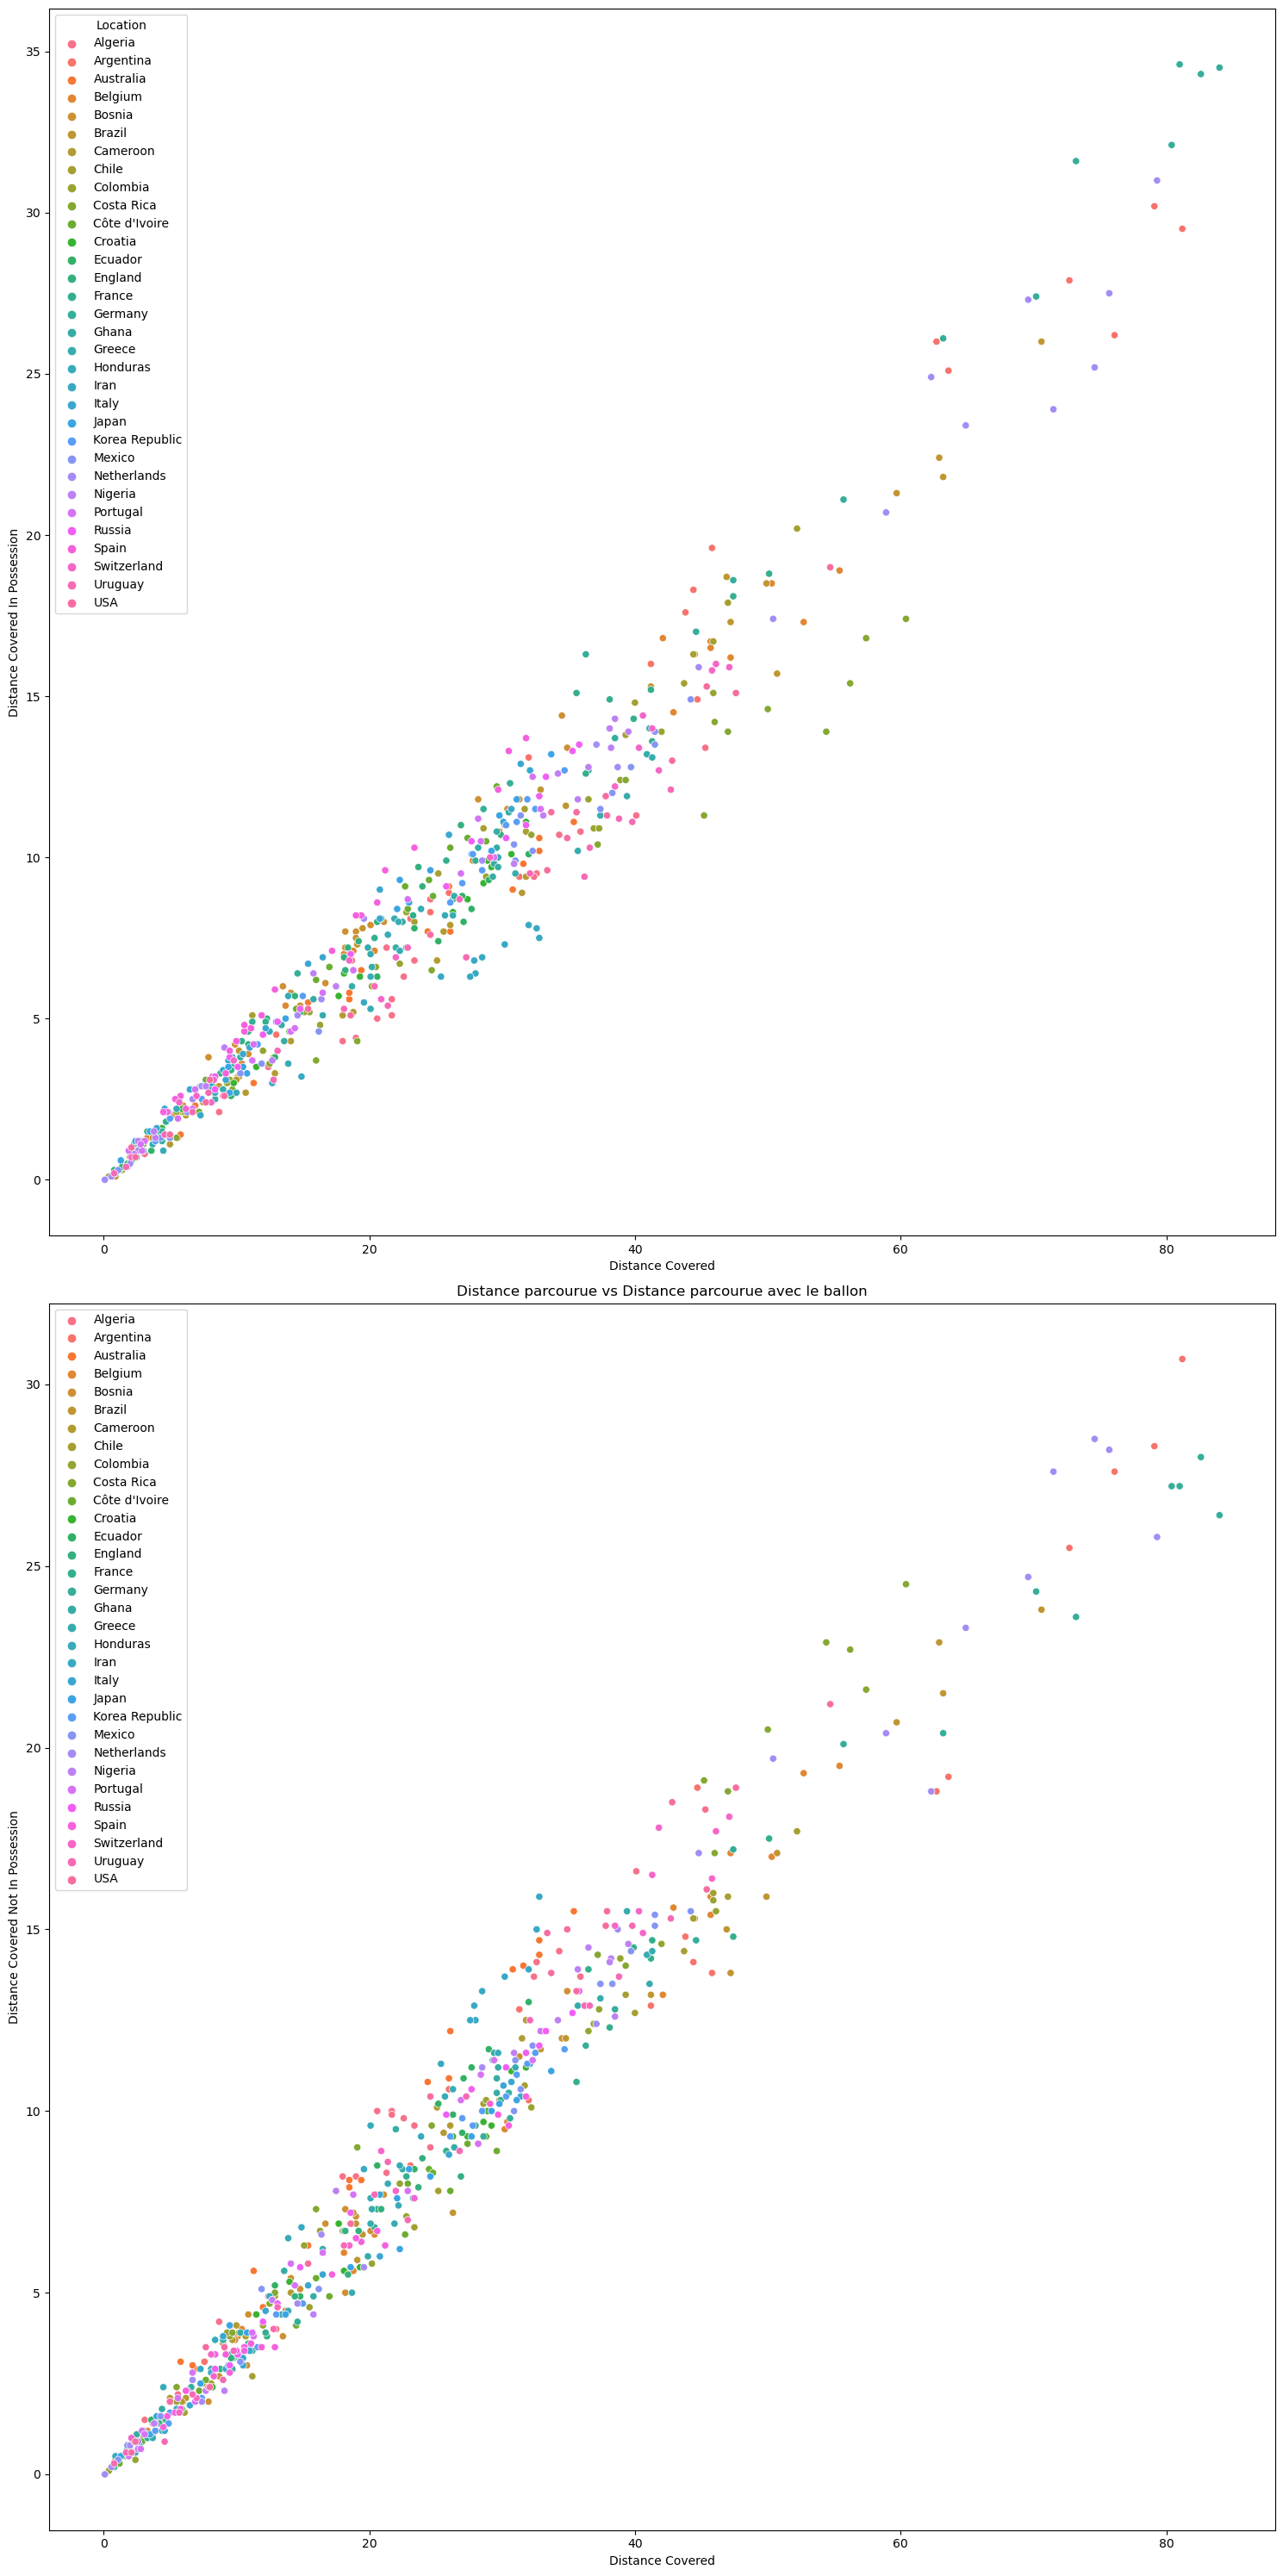

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,1,figsize=(15,30))
plt.title('Distance parcourue vs Distance parcourue avec le ballon')
sns.scatterplot(x='Distance Covered', y='Distance Covered In Possession', data=players2, hue='Location', ax=axs[0])
plt.title('Distance parcourue vs Distance parcourue avec le ballon')
sns.scatterplot(x='Distance Covered', y='Distance Covered Not In Possession', data=players2, hue='Location', ax=axs[1])
plt.legend()
plt.tight_layout()

In [ ]:
dentifiez les joueurs qui sont dans le premier décile des joueurs les
plus rapides en calculant le décile et 

sélectionnez les joueurs qui y
appartiennent. 

analysez le temps passé à courir sans la balle pour ces joueurs 

et identifiez celui qui a passé le plus clair de son temps à courir sans la balle


<AxesSubplot:title={'center':'Boxplot de la vitesse des joueurs.'}, xlabel='Top Speed'>

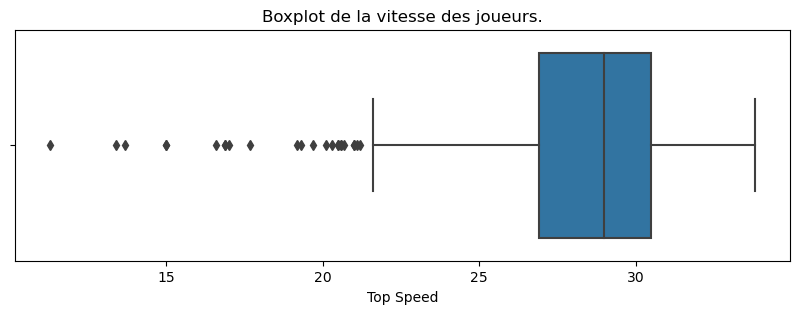

In [82]:
speed = clean_data(cdm[['Name', 'Location', 'Top Speed']])
plt.figure(figsize=(10,3))
plt.title('Boxplot de la vitesse des joueurs.')
sns.boxplot(speed['Top Speed'])

In [97]:
import numpy as np
deciles_steps = np.linspace(0.1, 0.9, 9)
deciles = list(speed['Top Speed'].quantile(deciles_steps))
deciles[0] # premier decile

24.1

In [101]:
speed_low=speed.loc[speed['Top Speed'] < deciles[0],:].sort_values(by=['Top Speed'], ascending=True) # les joeurs du permeir decile sorted
speed_low

Name        Location  Top Speed
548          Michel VORM     Netherlands       11.3
518       JUNG Sungryong  Korea Republic       13.4
513         KIM Seunggyu  Korea Republic       13.7
425      Noel VALLADARES        Honduras       15.0
188      Faryd MONDRAGON        Colombia       15.0
109        Asmir BEGOVIC          Bosnia       16.6
371        Adam KWARASEY           Ghana       16.9
300       Rickie LAMBERT         England       16.9
265      Stipe PLETIKOSA         Croatia       17.0
549             Tim KRUL     Netherlands       17.7
641           Pepe REINA           Spain       19.2
84      Thibaut COURTOIS         Belgium       19.3
119             HENRIQUE          Brazil       19.7
441        Reza HAGHIGHI            Iran       20.1
587      Vincent ENYEAMA         Nigeria       20.3
497       Eiji KAWASHIMA           Japan       20.5
282        Edison MENDEZ         Ecuador       20.5
447     Alireza HAGHIGHI            Iran       20.6
466     Salvatore SIRIGU           Italy       20.6
702     Fernando MUSLERA         Uruguay       20.7
141          Jean MAKOUN        Cameroon       21.0
291  Alexander DOMINGUEZ         Ecuador       21.0
303           Ben FOSTER         England       21.1
596       Helder POSTIGA        Portugal       21.2
153      Charles ITANDJE        Cameroon       21.6
602         Rui PATRICIO        Portugal       21.7
395     Orestis KARNEZIS          Greece       21.8
16           Rais MBOLHI         Algeria       22.0
564            Leroy FER     Netherlands       22.0
197         David OSPINA        Colombia       22.1
185         Carlos BACCA        Colombia       22.3
565     Jasper CILLESSEN     Netherlands       22.3
53        Mark BRESCIANO       Australia       22.3
508         HWANG Seokho  Korea Republic       22.4
485     Hiroshi KIYOTAKE           Japan       22.4
473     Gianluigi BUFFON           Italy       22.5
541      Guillermo OCHOA          Mexico       22.5
668     Valentin STOCKER     Switzerland       22.7
703         Diego LUGANO         Uruguay       22.7
283     Gabriel ACHILIER         Ecuador       22.7
642       Xavi HERNANDEZ           Spain       23.1
575        Ruben GABRIEL         Nigeria       23.1
407    Panagiotis GLYKOS          Greece       23.2
26       Hugo CAMPAGNARO       Argentina       23.3
579        Ejike UZOENYI         Nigeria       23.3
171       Carlos CARMONA           Chile       23.4
713        Jozy ALTIDORE             USA       23.5
304        Frank LAMPARD         England       23.5
509          KIM Bokyung  Korea Republic       23.6
323       Antonio MAVUBA          France       23.6
530         Raul JIMENEZ          Mexico       23.8
72      Thomas VERMAELEN         Belgium       23.8
576          Uche NWOFOR         Nigeria       23.8
552        Paul VERHAEGH     Netherlands       23.9
626         Igor DENISOV          Russia       23.9
380         Fatawu DAUDA           Ghana       23.9
656        Iker CASILLAS           Spain       23.9
657          Raul ALBIOL           Spain       23.9
677       Diego BENAGLIO     Switzerland       23.9
3           Riyad MAHREZ         Algeria       23.9

In [107]:
# tps passé à courir ss la balle pour ces joueurs
players2[players2['Name'].isin(speed_low['Name'].to_list())]\
                         .sort_values(by=['Distance Covered Not In Possession'], ascending=False)\
                         .head(3)

Name  Distance Covered        Location  \
565     Jasper CILLESSEN              37.1     Netherlands   
53        Mark BRESCIANO              19.4       Australia   
677       Diego BENAGLIO              22.0     Switzerland   
84      Thibaut COURTOIS              20.4         Belgium   
197         David OSPINA              20.2        Colombia   
541      Guillermo OCHOA              16.2          Mexico   
109        Asmir BEGOVIC              14.8          Bosnia   
395     Orestis KARNEZIS              18.7          Greece   
16           Rais MBOLHI              12.4         Algeria   
587      Vincent ENYEAMA              12.7         Nigeria   
447     Alireza HAGHIGHI              12.7            Iran   
3           Riyad MAHREZ               8.7         Algeria   
702     Fernando MUSLERA              12.8         Uruguay   
497       Eiji KAWASHIMA              10.8           Japan   
153      Charles ITANDJE              10.7        Cameroon   
642       Xavi HERNANDEZ              11.1           Spain   
304        Frank LAMPARD              10.9         England   
657          Raul ALBIOL              10.0           Spain   
425      Noel VALLADARES              10.0        Honduras   
380         Fatawu DAUDA               8.4           Ghana   
291  Alexander DOMINGUEZ               9.6         Ecuador   
265      Stipe PLETIKOSA               9.8         Croatia   
473     Gianluigi BUFFON              10.5           Italy   
626         Igor DENISOV               8.4          Russia   
552        Paul VERHAEGH               6.7     Netherlands   
703         Diego LUGANO               9.0         Uruguay   
656        Iker CASILLAS               6.2           Spain   
602         Rui PATRICIO               5.6        Portugal   
518       JUNG Sungryong               7.4  Korea Republic   
26       Hugo CAMPAGNARO               5.1       Argentina   
668     Valentin STOCKER               5.7     Switzerland   
509          KIM Bokyung               5.0  Korea Republic   
466     Salvatore SIRIGU               4.0           Italy   
641           Pepe REINA               4.8           Spain   
575        Ruben GABRIEL               3.9         Nigeria   
303           Ben FOSTER               4.2         England   
72      Thomas VERMAELEN               3.3         Belgium   
371        Adam KWARASEY               4.4           Ghana   
513         KIM Seunggyu               3.9  Korea Republic   
407    Panagiotis GLYKOS               3.7          Greece   
323       Antonio MAVUBA               3.3          France   
579        Ejike UZOENYI               2.3         Nigeria   
508         HWANG Seokho               2.3  Korea Republic   
713        Jozy ALTIDORE               2.4             USA   
564            Leroy FER               2.0     Netherlands   
283     Gabriel ACHILIER               1.8         Ecuador   
576          Uche NWOFOR               2.1         Nigeria   
171       Carlos CARMONA               1.2           Chile   
596       Helder POSTIGA               1.9        Portugal   
282        Edison MENDEZ               1.4         Ecuador   
485     Hiroshi KIYOTAKE               1.3           Japan   
441        Reza HAGHIGHI               0.9            Iran   
530         Raul JIMENEZ               1.1          Mexico   
185         Carlos BACCA               2.4        Colombia   
141          Jean MAKOUN               1.1        Cameroon   
119             HENRIQUE               0.9          Brazil   
300       Rickie LAMBERT               0.8         England   
188      Faryd MONDRAGON               0.4        Colombia   
548          Michel VORM               0.1     Netherlands   
549             Tim KRUL               0.1     Netherlands   

     Distance Covered In Possession  Distance Covered Not In Possession  
565                            13.5                                12.4  
53                              6.5                                 8.1  
677            

### VILLES

In [54]:
!pip install folium
import pandas as pd
import numpy as np
import folium
import json

In [55]:
file = 'data/villes.txt'
data = pd.read_csv(file, delimiter='\t')
data

Nom Ville                     MAJ      Code Postal   \
0       L'Abergement-Clémenciat   L ABERGEMENT CLEMENCIAT            1400   
1         L'Abergement-de-Varey      L ABERGEMENT DE VAREY           1640   
2                      Amareins                AMAREINS              1090   
3             Ambérieu-en-Bugey         AMBERIEU EN BUGEY            1500   
4           Ambérieux-en-Dombes       AMBERIEUX EN DOMBES            1330   
...                          ...                       ...            ...   
35244               Saint-Michel              SAINT MICHEL           9100   
35245           Lorp-Sentaraille          LORP SENTARAILLE           9190   
35246             Soueix-Rogalle            SOUEIX ROGALLE           9140   
35247                     Soulan                    SOULAN           9320   
35248                 Villeneuve                VILLENEUVE           9800   

        Code INSEE   Code Région   Latitude   Longitude   Eloignement   
0              1001           82   46.150000    4.916667          1.46  
1              1002           82   46.000000    5.416667             1  
2              1003           82   46.083333         4.8          1.85  
3              1004           82   45.950000        5.35           0.8  
4              1005           82   46.000000         4.9          1.72  
...             ...          ...         ...         ...           ...  
35244          9271            0   43.135000      1.5025           NaN  
35245          9289            0   43.008888    1.119444           NaN  
35246          9299            0   42.893333    1.211388           NaN  
35247          9301            0   42.913333    1.233055           NaN  
35248          9335            0   42.938333    0.981666           NaN  

[35249 rows x 8 columns]

In [56]:
transform_names(data)
data.columns

Index(['NomVille', 'MAJ', 'Code_Postal', 'Code_INSEE', 'Code_Région',
       'Latitude', 'Longitude', 'Eloignement'],
      dtype='object')

 Utilisez les fonctionnalités de pandas pour trouver le nombre de codes
INSEE différents en supprimant les doublons.
4. Utilisez les fonctionnalités de pandas pour calculer rapidement la
moyenne, le nombre et le maximum pour chaque variable numérique.
Exercice 3 Disponibilité des vélibs avec Streamlit :
5. Comptez le nombre de villes dans chaque région à l'aide des
fonctionnalités de pandas et créez un dictionnaire où la clé est la
région et la valeur est le nombre de villes.
6. Utilisez les fonctionnalités de Streamlit pour représenter les communes
à l'aide de matplotlib et une librairie de cartographie comme folium.
1. Utilisez  st.file_uploader()  pour permettre aux utilisateurs de
télécharger les fichiers  velib_t1.txt  et  velib_t2.txt .

In [57]:
insee = list(set(data['Code_INSEE'].values))
res_3=f"Il y a {len(insee)} Codes INSEE différents."
print(res_3)

Il y a 35248 Codes INSEE différents.


In [58]:
print(data.dtypes)
data.head()

NomVille        object
MAJ             object
Code_Postal      int64
Code_INSEE       int64
Code_Région      int64
Latitude       float64
Longitude       object
Eloignement     object
dtype: object


NomVille                       MAJ  Code_Postal  \
0   L'Abergement-Clémenciat   L ABERGEMENT CLEMENCIAT          1400   
1     L'Abergement-de-Varey      L ABERGEMENT DE VAREY         1640   
2                  Amareins                AMAREINS            1090   
3         Ambérieu-en-Bugey         AMBERIEU EN BUGEY          1500   
4       Ambérieux-en-Dombes       AMBERIEUX EN DOMBES          1330   

   Code_INSEE  Code_Région   Latitude Longitude Eloignement  
0        1001           82  46.150000  4.916667        1.46  
1        1002           82  46.000000  5.416667           1  
2        1003           82  46.083333       4.8        1.85  
3        1004           82  45.950000      5.35         0.8  
4        1005           82  46.000000       4.9        1.72

In [59]:
# 4 
res_4="Les données numériques sont : Latitude, Longitude et Eloignement de chaque ville."
print(res_4)

numeric = ['Latitude', 'Longitude', 'Eloignement']

numeric_cast(data, cols=numeric)
round(data[numeric].describe().iloc[[0,1,7],:], 2) # moyenne nombre et max

Les données numériques sont : Latitude, Longitude et Eloignement de chaque ville.


Latitude  Longitude  Eloignement
count  35249.00   35183.00     35162.00
mean      47.00       2.76         1.47
max       51.08       9.53         3.00

In [60]:
# nbre de villes par région
res_5 ="Le nombre de villes par régions est donnée par :"
regions = data[['NomVille', 'Code_Région']]
regions = regions.groupby('Code_Région').size().to_dict()
regions = dict(sorted(regions.items(), key=lambda v: v[0]))
print(res_5)
regions

Le nombre de villes par régions est donnée par :


{0: 86,
 11: 4181,
 21: 1462,
 22: 1433,
 23: 1342,
 24: 1766,
 25: 1774,
 26: 1483,
 31: 1494,
 41: 1825,
 43: 1104,
 52: 1188,
 53: 1243,
 54: 830,
 72: 5450,
 73: 1535,
 74: 837,
 82: 2368,
 83: 977,
 91: 1871,
 93: 662,
 94: 338}

In [70]:
def transform_names(d):
    new_colnames = list(map(lambda m: m.replace('Code ', 'Code_'), d.columns))
    new_colnames = list(map(lambda m: m.replace(' ', ''), new_colnames))
    mapping = dict(zip(d.columns, new_colnames))
    return d.rename(columns=mapping, inplace=True) 

def numeric_cast(d, cols):
    """Force le type des colonnes en float en mettant np.nan lorsque ce n'est paspossible.
    param cols: liste de colonnes numériques.
    param d: jeu de données pd.DataFrame.
    """
    for c in data.columns:
        if c in cols:
            try:
                data[c] = data[c].astype(float)  
            except Exception as e:
                if type(e) == ValueError:
                    # remplacer les caractères non convertibles par des np.nan
                    data[c] = data[c].apply(lambda r: np.nan if r==' -     ' else float(r))
                else :
                    print(f'{c} : {e}')

def transform_villes(d):
    """Retirer les espaces avant et après le nom de la ville."""
    d['NomVille'] = d['NomVille'].apply(lambda r: r.rstrip().lstrip())
    d['MAJ'] = d['MAJ'].apply(lambda r: r.rstrip().lstrip())

In [84]:
france = folium.Map(location = [47, 3],
               zoom_start = 6)

transform_villes(data)

selection_villes = ['PARIS', 'MARSEILLE', 'RENNES', 'NIORT']

for i,row in data.loc[data['MAJ'].isin(selection_villes),['NomVille', 'MAJ', 'Latitude', 'Longitude']].dropna().iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['NomVille']).add_to(france)
    
france

## velibs 
Utilisez  st.file_uploader()  pour permettre aux utilisateurs de
télécharger les fichiers  velib_t1.txt  et  velib_t2.txt .
2. Une fois les fichiers téléchargés, utilisez pandas pour charger les
données dans des DataFrames.
3. Représentez la localisation des stations vélib dans Paris en utilisant les
fonctionnalités de folium pour créer une carte interactive.
4. Comparez l'évolution de la disponibilité pour une station donnée en
fusionnant les deux bases de données et en représentant les stations
qui ont connu une évolution significative (plus de 5 changements) avec
un gradient de couleurs.

In [144]:
velib1, velib2 = 'data/velib_t1.txt', 'data/velib_t2.txt'

with open(velib1) as f:
    content = json.load(f)
    velib1 = pd.DataFrame(content)
    
with open(velib2) as f:
    content = json.load(f)
    velib2 = pd.DataFrame(content)
    
df_dict = {'velib1': velib1, 'velib2': velib2}
df_selected = 'velib1' # 'velib2'
df = df_dict[df_selected]
df.head(3)

status  bike_stands contract_name  banking  available_bikes  \
0   OPEN           50         Paris     True                3   
1   OPEN           33         Paris     True               33   
2   OPEN           44         Paris     True                0   

                                            position    last_update  \
0  {'lat': 48.8645278209514, 'lng': 2.41617072442...  1442932668000   
1  {'lat': 48.87242006305313, 'lng': 2.3483952362...  1442932457000   
2  {'lat': 48.882148945631904, 'lng': 2.319860054...  1442932695000   

                             name  available_bike_stands  number  \
0    31705 - CHAMPEAUX (BAGNOLET)                     47   31705   
1  10042 - POISSONNIÈRE - ENGHIEN                      0   10042   
2              08020 - METRO ROME                     43    8020   

                                             address  bonus  
0  RUE DES CHAMPEAUX (PRES DE LA GARE ROUTIERE) -...   True  
1  52 RUE D'ENGHIEN / ANGLE RUE DU FAUBOURG POISS...  False  
2         74 BOULEVARD DES BATIGNOLLES - 75008 PARIS   True

In [148]:
france = folium.Map(location = [48.85, 2.35],
               zoom_start = 12)

villes_dispo = list(set(df['contract_name']))

selection_villes = ['Paris']

for i,row in df.loc[df['contract_name'].isin(selection_villes),:].dropna().iterrows():
    #print(row['position']['lng'])
    #folium.Marker([row['position']['lat'], row['position']['lng']], popup=row['name']).add_to(france)
    folium.CircleMarker([row['position']['lat'], row['position']['lng']], radius=1, popup=None, tooltip=None).add_to(france)
    
france

In [185]:
# Comparez l'évolution de la disponibilité pour une station donnée en fusionnant les deux bases 
# de données et en représentant les stations qui ont connu une évolution significative (plus de 5 changements) 
# avec un gradient de couleurs.

velib = pd.concat([velib1, velib2]).reset_index()

In [187]:
velib.tail(1).T

2457
index                                                               1228
status                                                              OPEN
bike_stands                                                           19
contract_name                                                      Paris
banking                                                             True
available_bikes                                                       15
position               {'lat': 48.87242997325711, 'lng': 2.3554893901...
last_update                                                1442934085000
name                                               10007 - CHATEAU D'EAU
available_bike_stands                                                  4
number                                                             10007
address                            57 RUE DU CHATEAU D'EAU - 75010 PARIS
bonus                                                              False

In [150]:
!pip install colour

In [166]:
import folium.plugins as fg
help(folium.CircleMarker)

Help on class CircleMarker in module folium.vector_layers:

class CircleMarker(folium.map.Marker)
 |  CircleMarker(location: Union[Sequence[float], NoneType] = None, radius: float = 10, popup: Union[folium.map.Popup, str, NoneType] = None, tooltip: Union[folium.map.Tooltip, str, NoneType] = None, **kwargs: Union[bool, str, float, NoneType])
 |  
 |  A circle of a fixed size with radius specified in pixels.
 |  
 |  See :func:`folium.vector_layers.path_options` for the `Path` options.
 |  
 |  Parameters
 |  ----------
 |  location: tuple[float, float]
 |      Latitude and Longitude pair (Northing, Easting)
 |  popup: string or folium.Popup, default None
 |      Input text or visualization for object displayed when clicking.
 |  tooltip: str or folium.Tooltip, default None
 |      Display a text when hovering over the object.
 |  radius: float, default 10
 |      Radius of the circle marker, in pixels.
 |  **kwargs
 |      Other valid (possibly inherited) options. See:
 |      https://l

In [195]:
#Available bikes
#We can normalize the number of available bikes using the total number of bikes for each station. 
#This give information if the station is relatively empty or not. 
#We can plot this information directly to a map using the coordinates of the station 
#and a function that colours the station to red if the station is empty and green if the station is full.

from colour import Color
red = Color("red")
colors = list(red.range_to(Color("green").hex,10))
def red(brightness):
    brightness = int(round(9 * brightness)) # convert from 0.0-1.0 to 0-255
    return colors[brightness]
    
m = folium.Map(location=[48.856614, 2.3522219], zoom_start=13)

for k,row in velib.iterrows():
    #folium.HeatMap(data=)
    folium.CircleMarker(location=[row.position['lat'], row.position['lng']], 
                        fill_color=red(row.available_bikes/float(row.bike_stands)).hex,
                        popup= f"{str(row.available_bikes)} disponible(s) / {str(row.bike_stands)}",
                        radius=7).add_to(m)
m

In [199]:
x = velib[['name', 'status', 'last_update']].groupby(by=['name']).size().to_dict()
x = dict(sorted(x.items(), key=lambda v: v[1]))
#{i:j for i,j in x.items() if j>=5}
x

{'00901 - PORT SOLFÉRINO (STATION MOBILE)': 2,
 '00903 - QUAI MAURIAC  / PONT DE BERCY': 2,
 '00904 - PLACE JOFFRE / ECOLE MILITAIRE': 2,
 '00905 - CONCORDE/BERGES DE SEINE (STATION MOBILE)': 2,
 "00906 - GARE DE L'EST": 2,
 '00908 - PORT DU GROS CAILLOU (STATION MOBILE)': 2,
 '01001 - ILE DE LA CITE PONT NEUF': 2,
 '01002 - PLACE DU CHATELET': 2,
 '01003 - RIVOLI SAINT DENIS': 2,
 '01004 - MARGUERITE DE NAVARRE': 2,
 '01005 - LES HALLES - SEBASTOPOL': 2,
 '01006 - GRANDE TRUANDERIE': 2,
 '01007 - ETIENNE MARCEL': 2,
 '01009 - PONT NEUF - 14': 2,
 '01010 - PONT NEUF': 2,
 '01012 - BOURSE DU COMMERCE': 2,
 '01013 - SAINT HONORE': 2,
 '01014 - RIVOLI MUSEE DU LOUVRE': 2,
 '01015 - PLACE ANDRE MALRAUX': 2,
 '01016 - OPERA PYRAMIDES': 2,
 '01017 - SAINT HONORE': 2,
 '01018 - RIVOLI TUILERIE': 2,
 '01019 - SAINT HONORE VENDOME': 2,
 '01020 - RIVOLI CONCORDE': 2,
 '01022 - RUE DE LA PAIX': 2,
 '01023 - ANDRE MALRAUX MUSEE DU LOUVRE': 2,
 '01024 - LOUVRE COQ HERON': 2,
 "01025 - TEMPLE DE L'O

In [203]:
help(folium.CircleMarker)

Help on class CircleMarker in module folium.vector_layers:

class CircleMarker(folium.map.Marker)
 |  CircleMarker(location: Union[Sequence[float], NoneType] = None, radius: float = 10, popup: Union[folium.map.Popup, str, NoneType] = None, tooltip: Union[folium.map.Tooltip, str, NoneType] = None, **kwargs: Union[bool, str, float, NoneType])
 |  
 |  A circle of a fixed size with radius specified in pixels.
 |  
 |  See :func:`folium.vector_layers.path_options` for the `Path` options.
 |  
 |  Parameters
 |  ----------
 |  location: tuple[float, float]
 |      Latitude and Longitude pair (Northing, Easting)
 |  popup: string or folium.Popup, default None
 |      Input text or visualization for object displayed when clicking.
 |  tooltip: str or folium.Tooltip, default None
 |      Display a text when hovering over the object.
 |  radius: float, default 10
 |      Radius of the circle marker, in pixels.
 |  **kwargs
 |      Other valid (possibly inherited) options. See:
 |      https://l